# ***Introduction to Radar Using Python and MATLAB***
## Andy Harrison - Copyright (C) 2019 Artech House
<br/>

# Linear Wire Antennas
***

Referring to Section 3.2.1, these types of antennas are some of the oldest, they are still in use in radar systems today.  They have the advantage of being cheap, easy to design, and easy to fabricate.

### Hertzian Dipole
Referring to Section 4.1, this is a very simplistic radiating element and is often referred to as an infinitesimal dipole.  This type of radiating element is characterized by a length much less than the wavelength and has a uniform current distribution as shown in Figure 4.1.  While this is very difficult to implement, there are many advantages to studying this type of radiating element.  It is useful as a building block for analyzing larger wire antennas and for studying the radar range equation.  The current on the Hertzian dipole is constant over the length of the wire. 

### Small Dipole
Referring to Section 3.2.1.1, consider a small dipole whose length is on the order of $\lambda/50 < l < \lambda/10$.  For dipole antennas of this size, a good approximation of the current distribution is triangular, as shown in Figure 3.7. The triangular current distribution is written as

$$
    \vec{I}(x', y', z') = \begin{cases}
        I_0 \, \left(1 - \dfrac{2}{l} z' \right) \hat{z}   &  \text{for}\hspace{5pt} 0 \leq z' \leq l/2 \\ \\
        I_0 \, \left(1 + \dfrac{2}{l} z' \right) \hat{z}   &\text{for}\hspace{5pt}   -l/2 \leq z' < 0, \\
    \end{cases}
$$

### Finite Length Dipole
Referring to Section 3.2.1.2, the current distribution for a finite length dipole needs to be changed to a sinusoidal form.  For these types of antennas, the length is considered to be much greater than the radius of the wire.  This allows the current distribution on the wire to be written as

$$
    \vec{I}(x', y', z') = \begin{cases}
        I_0 \, \left[k \left(\dfrac{l}{2} - z'\right)\right] \hat{z}   &   \text{for}\hspace{5pt}0 \leq z' \leq l/2 \\ \\
        I_0 \, \left[k \left(\dfrac{l}{2} + z'\right)\right] \hat{z}   & \text{for}\hspace{5pt}  -l/2 \leq z' < 0, \\
    \end{cases}
$$
***

Begin by getting the library path

In [1]:
import lib_path

Set the frequency (Hz), the wire length (m) and the wire current (A)

In [2]:
frequency = 1e9

length = 0.4

current = 1.0

Set the angular span using the `linspace` routine from `scipy`

In [3]:
from numpy import linspace, finfo

from scipy.constants import pi


theta = linspace(finfo(float).eps, 2.0 * pi, 1000)

Calculate the antenna parameters and antenna pattern for either the infinitesimal dipole, small dipole or finitie length dipole

In [4]:
from Libs.antenna.linear_wire import finite_length_dipole, infinitesimal_dipole, small_dipole


antenna_type = 'finite_length_dipole'


if antenna_type == 'infinitesimal_dipole':

    total_power_radiated = infinitesimal_dipole.radiated_power(frequency, length, current)

    radiation_resistance = infinitesimal_dipole.radiation_resistance(frequency, length)

    beamwidth = infinitesimal_dipole.beamwidth()

    directivity = infinitesimal_dipole.directivity()

    maximum_effective_aperture = infinitesimal_dipole.maximum_effective_aperture(frequency)

    _, et, _, _, _, _ = infinitesimal_dipole.far_field(frequency, length, current, 1e9, theta)
    
    

elif antenna_type == 'small_dipole':

    total_power_radiated = small_dipole.radiated_power(frequency, length, current)

    radiation_resistance = small_dipole.radiation_resistance(frequency, length)

    beamwidth = small_dipole.beamwidth()

    directivity = small_dipole.directivity()

    maximum_effective_aperture = small_dipole.maximum_effective_aperture(frequency)

    _, et, _, _, _, _ = small_dipole.far_field(frequency, length, current, 1e9, theta)
    
    

else:

    total_power_radiated = finite_length_dipole.radiated_power(frequency, length, current)

    radiation_resistance = finite_length_dipole.radiation_resistance(frequency, length)

    beamwidth = finite_length_dipole.beamwidth(frequency, length)

    directivity = finite_length_dipole.directivity(frequency, length, current)

    maximum_effective_aperture = finite_length_dipole.maximum_effective_aperture(frequency, length, current)

    _, et, _, _, _, _ = finite_length_dipole.far_field(frequency, length, current, 1e9, theta)

Display the antenna parameters

In [5]:
print('Total radiated power (W)     {:.2f}'.format(total_power_radiated))

print('Radiation Resistance (Ohms)  {:.2f}'.format(radiation_resistance))

print('Beamwidth (degrees)          {:.2f}'.format(beamwidth))

print('Directivity                  {:.2f}'.format(directivity))

print('Max Effective Aperture (m^2) {:.2f}'.format(maximum_effective_aperture))

Total radiated power (W)     43.49
Radiation Resistance (Ohms)  86.97
Beamwidth (degrees)          27.92
Directivity                  3.09
Max Effective Aperture (m^2) 0.02


Display the antenna pattern using the `matplotlib` routines

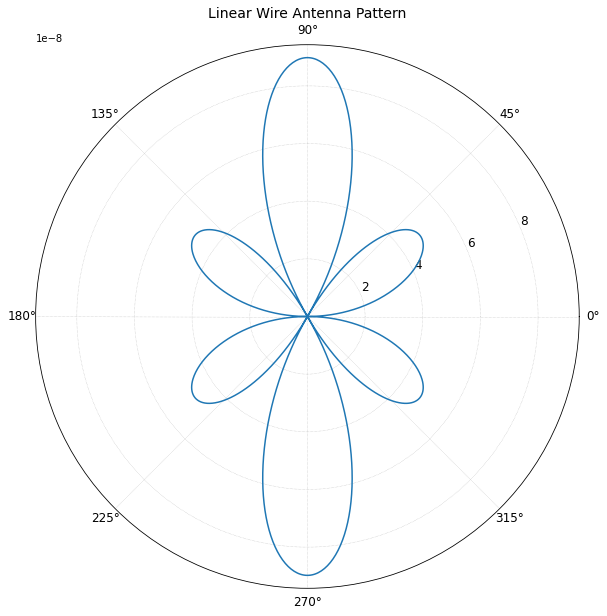

In [6]:
from matplotlib import pyplot as plt


# Set the figure size

plt.rcParams["figure.figsize"] = (15, 10)



# Display the results

plt.polar(theta, abs(et), '')



# Set the plot title and labels

plt.title('Linear Wire Antenna Pattern', size=14)



# Set the tick label size

plt.tick_params(labelsize=12)



# Turn on the grid

plt.grid(linestyle=':', linewidth=0.5)